The data belongs to a Kaggle competition. Please download the data.

In [1]:
import os

train_dir = "/data/train/train/"
test_dir = "/data/test1/test1"

train_files = os.listdir(train_dir)
train_files = [ os.path.join(train_dir, f) for f in train_files]

test_files = os.listdir(test_dir)
test_files = [ os.path.join(test_dir, f) for f in test_files]


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


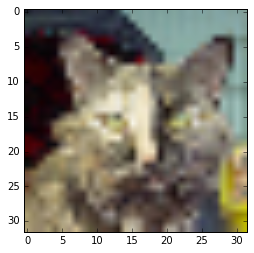

In [2]:
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow( imresize( imread(train_files[2]) , (32,32,3)) )
plt.show()

Prepare your training set and testing set

In [3]:
import numpy as np

IM_TRAINING = 1000

BLOCK = 32

N_BANDS=3

files =  np.random.choice(train_files, 10000)

X_train = np.array( [imresize( imread(f) , (BLOCK,BLOCK,N_BANDS)) for f in files] )

categories = ["cat","dog"]

Y_train = np.array([ [1,0] if "cat" in f else [0,1] for f in files ])

Define the network

In [38]:
tf.reset_default_graph()

In [40]:
import tensorflow as tf
from tensorflow.contrib.layers import convolution2d, max_pool2d, flatten, fully_connected, batch_norm, softmax

N_LABELS=2

x = tf.placeholder(tf.float32, shape=[None, BLOCK, BLOCK, N_BANDS])
y = tf.placeholder(tf.float32, shape=[None, N_LABELS])
is_training=tf.placeholder(tf.bool, name="is_training")

#logits = convolution2d(x, 64, [5,5], activation_fn=tf.nn.relu, scope="Conv-1")
#logits = max_pool2d(logits, [4,4], scope="pool-1")
#logits = convolution2d(logits, 128, [5,5], activation_fn=tf.nn.relu,scope="Conv-2")
#logits = max_pool2d(logits, [4,4], scope="pool-2")
#logits = flatten(logits, scope="flatten-1")
#logits = fully_connected(logits, 256, scope="dense-1")
#logits = fully_connected(logits, 2, scope="dense-2")
#logits = softmax(logits, scope="softmax-1")

logits = convolution2d(x, 64, [5,5], normalizer_fn=batch_norm, normalizer_params={"is_training":is_training}, activation_fn=tf.nn.elu, scope="Conv-1")
logits = max_pool2d(logits, [4,4], scope="pool-1")
logits = convolution2d(logits, 128, [5,5], normalizer_fn=batch_norm, normalizer_params={"is_training":is_training}, activation_fn=tf.nn.elu, scope="Conv-2" )
logits = max_pool2d(logits, [4,4], scope="pool-2")
logits = flatten(logits, scope="flatten-1")
logits = fully_connected(logits, 256, scope="dense-1")
logits = fully_connected(logits, 2, scope="dense-2")
logits = softmax(logits, scope="softmax-1")

loss = tf.reduce_mean(tf.squared_difference(logits, y))
train_step = tf.train.AdamOptimizer(1e-3).minimize(loss)

In [44]:
BATCH_SIZE=60
N_EPOCH=4
index = np.arange(0, X_train.shape[0], BATCH_SIZE)

sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())

for e in range(N_EPOCH):
    print "Epoch index: {}".format(e)
    for idx, (start, end) in enumerate(zip(index[:-1], index[1:])):
        xbatch, ybatch = X_train[start:end, :,:,:], Y_train[start:end,]
        Loss=0.
        
        if not(e%2):
            #print "Batch index: {}".format(idx)    
            sess.run(train_step, feed_dict={x: xbatch, y: ybatch, is_training:True} )
        else:
            Loss+=sess.run(loss, feed_dict={x: xbatch, y: ybatch, is_training:False} )
        
    print "Loss: {}".format(Loss)

Epoch index: 0
Loss: 0.0
Epoch index: 1
Loss: 0.516666650772
Epoch index: 2
Loss: 0.0
Epoch index: 3
Loss: 0.516666650772


In [98]:
test_files =  np.random.choice(train_files, 1000)

X_test = np.array( [imresize( imread(f) , (BLOCK,BLOCK,N_BANDS)) for f in test_files] )

categories = ["cat","dog"]

Y_test = np.array([ [1,0] if "cat" in f else [0,1] for f in test_files ])

In [7]:
from sklearn.metrics import confusion_matrix

X, Y = X_train, Y_train

index = np.arange(0, X.shape[0], BATCH_SIZE)

cm=np.zeros((N_LABELS, N_LABELS))

N_LIMIT=1000

for idx, (start, end) in enumerate(zip(index[:-1], index[1:])):
    print "Batch index: {}".format(idx)
    xbatch, ybatch = X[start:end, :,:,:], Y[start:end, ]
    preds = sess.run(logits, feed_dict={x: xbatch} )
    
    if idx > N_LIMIT:
        break
    
    cm+=confusion_matrix(ybatch.argmax(axis=1), preds.argmax(axis=1), labels=range(N_LABELS))

Batch index: 0


/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2699: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


Batch index: 1
Batch index: 2
Batch index: 3
Batch index: 4
Batch index: 5
Batch index: 6
Batch index: 7
Batch index: 8
Batch index: 9
Batch index: 10
Batch index: 11
Batch index: 12
Batch index: 13
Batch index: 14
Batch index: 15
Batch index: 16
Batch index: 17
Batch index: 18
Batch index: 19
Batch index: 20
Batch index: 21
Batch index: 22
Batch index: 23
Batch index: 24
Batch index: 25
Batch index: 26
Batch index: 27
Batch index: 28
Batch index: 29
Batch index: 30
Batch index: 31
Batch index: 32
Batch index: 33
Batch index: 34
Batch index: 35
Batch index: 36
Batch index: 37
Batch index: 38
Batch index: 39
Batch index: 40
Batch index: 41
Batch index: 42
Batch index: 43
Batch index: 44
Batch index: 45
Batch index: 46
Batch index: 47
Batch index: 48
Batch index: 49
Batch index: 50
Batch index: 51
Batch index: 52
Batch index: 53
Batch index: 54
Batch index: 55
Batch index: 56
Batch index: 57
Batch index: 58
Batch index: 59
Batch index: 60
Batch index: 61
Batch index: 62
Batch index: 63
B

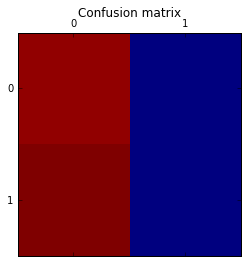

In [8]:
plt.matshow(cm)
plt.title("Confusion matrix")

In [29]:
from sklearn.metrics import confusion_matrix

X, Y = X_train, Y_train

index = np.arange(0, X.shape[0], BATCH_SIZE)

predList = list()
lblList = list()

N_LIMIT=100

for idx, (start, end) in enumerate(zip(index[:-1], index[1:])):
    print "Batch index: {}".format(idx)
    xbatch, ybatch = X[start:end, :,:,:], Y[start:end, ]
    preds = sess.run(logits, feed_dict={x: xbatch} )
    
    if idx > N_LIMIT:
        break
    
    predList.append( preds )
    lblList.append( ybatch )

Batch index: 0
Batch index: 1
Batch index: 2
Batch index: 3
Batch index: 4
Batch index: 5
Batch index: 6
Batch index: 7
Batch index: 8
Batch index: 9
Batch index: 10
Batch index: 11
Batch index: 12
Batch index: 13
Batch index: 14
Batch index: 15
Batch index: 16
Batch index: 17
Batch index: 18
Batch index: 19
Batch index: 20
Batch index: 21
Batch index: 22
Batch index: 23
Batch index: 24
Batch index: 25
Batch index: 26
Batch index: 27
Batch index: 28
Batch index: 29
Batch index: 30
Batch index: 31
Batch index: 32
Batch index: 33
Batch index: 34
Batch index: 35
Batch index: 36
Batch index: 37
Batch index: 38
Batch index: 39
Batch index: 40
Batch index: 41
Batch index: 42
Batch index: 43
Batch index: 44
Batch index: 45
Batch index: 46
Batch index: 47
Batch index: 48
Batch index: 49
Batch index: 50
Batch index: 51
Batch index: 52
Batch index: 53
Batch index: 54
Batch index: 55
Batch index: 56
Batch index: 57
Batch index: 58
Batch index: 59
Batch index: 60
Batch index: 61
Batch index: 62
Ba

In [30]:
preds, lbls = np.vstack(predList), np.vstack(lblList)

In [32]:
preds

array([[ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       ..., 
       [ 0.5,  0.5],
       [ 0.5,  0.5],
       [ 0.5,  0.5]], dtype=float32)